## DSC530
### Xin Tang
### Term Project

### dataset description:
 This is a dataset from Kaggle.com. It contains the used car sale info from various location in country of Pakistain. The data has 14 columns and more than 46K  sales records.
 

### Task 1&2 : pick 5 variables and describle them.
   The 5variables are: 
   1. Company Name:  the car manufactuer company name
   2. Model Name:    the car model name
   3. Price:         the car sale price
   4. Model Year:    The year car was originally made
   5. mileage:       The car mileage at moment of sales
   
   There are other variables like Engine type will be used to do analysis. 

### Task 3: plot histogram of the 5 variables and identify outliner. how the outliner will be handled. 

### import data

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import thinkstats2
import thinkplot
from scipy import stats

# data file 'Clean Data_pakwheels.csv' could also be found at http://localhost:8888/tree
#filePath = 'C:\\Users\\Daisy\\Documents\\Xin\\Data science\\DSC530\\new data\\new data car price\\'
#fileName = 'Clean Data_pakwheels.csv'
#completename = filePath + fileName
#df = pd.read_csv(completename)
df = pd.read_csv('Clean Data_pakwheels.csv')

### explore the data and check unique values. 

In [2]:
cols = df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} of unique values in {} column out of {}'.format(df[cols[i]].nunique(), cols[i], len(df)))
print(Unique_Values())
df.info()
print('variables with NA values', df.isna().sum())

There are 46022 of unique values in ID column out of 46022
There are 31 of unique values in Company Name column out of 46022
There are 196 of unique values in Model Name column out of 46022
There are 1419 of unique values in Price column out of 46022
There are 30 of unique values in Model Year column out of 46022
There are 6 of unique values in Location column out of 46022
There are 5573 of unique values in Mileage column out of 46022
There are 3 of unique values in Engine Type column out of 46022
There are 75 of unique values in Engine Capacity column out of 46022
There are 24 of unique values in Color column out of 46022
There are 2 of unique values in Assembly column out of 46022
There are 6 of unique values in Body Type column out of 46022
There are 2 of unique values in Transmission Type column out of 46022
There are 2 of unique values in Registration Status column out of 46022
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 

### the dataset is clean with no empty values. 

### Start to plot the histogram, Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails 

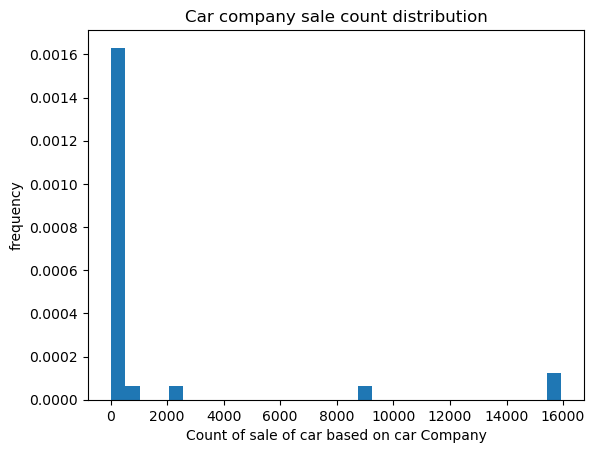

In [3]:
company_name = df['Company Name'].value_counts()
plt.hist(company_name, bins =31, density=True)
plt.xlabel('Count of sale of car based on car Company')
plt.ylabel('frequency')
plt.title('Car company sale count distribution')
plt.show()

The histogram shows that the car sale based on company is not symmetric, no obvious spread or tail. only 2 companies made most sales (>16000 sales) and most companies made very few sales (<2000 sales)

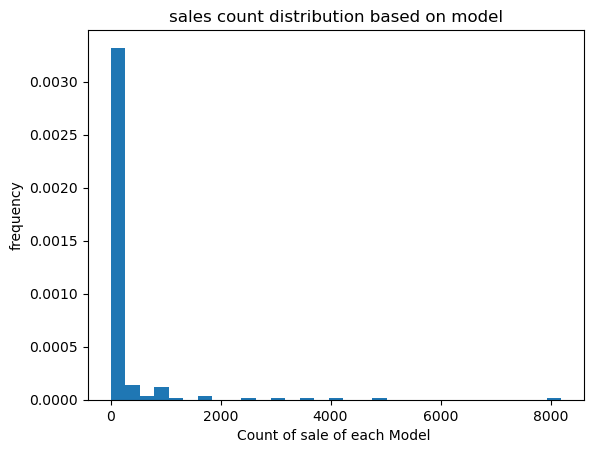

In [4]:
model_name = df['Model Name'].value_counts()
plt.hist(model_name, bins =31, density=True)
plt.xlabel('Count of sale of each Model ')
plt.ylabel('frequency')
plt.title('sales count distribution based on model')
plt.show()

The histogram shows that the car sale based on model is a right skewed narrow bell shaped distribution with long tail. it is possible a pareto distribution.

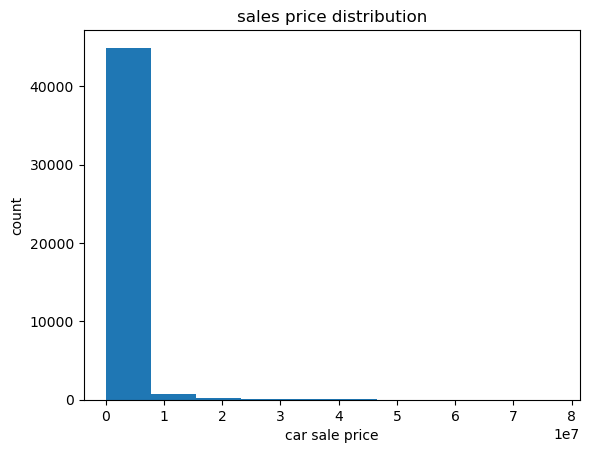

In [6]:
plt.hist(df['Price'])
plt.xlabel('car sale price')
plt.ylabel('count')
plt.title('sales price distribution')
plt.show()

The histogram shows that the car sale price is a right skewed narrow bell shaped distribution with long tail, likely a pareto distibution. This maybe due to the sales are concentrated on 3 models and they are sold at similar price range.

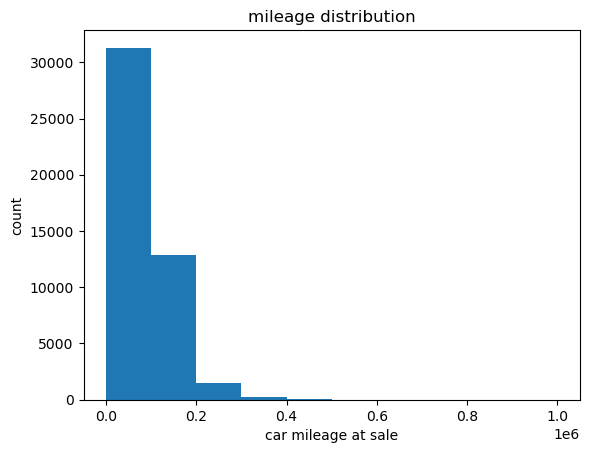

In [7]:
plt.hist(df['Mileage'])
plt.xlabel('car mileage at sale')
plt.ylabel('count')
plt.title('mileage distribution')
plt.show()

The histogram shows that the car milage at sales is a right skewed narrow bell shaped distribution with long tail, likely a pareto distibution.

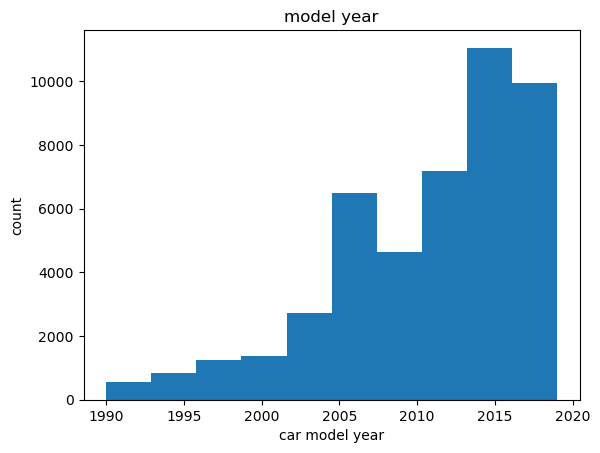

In [8]:
plt.hist(df['Model Year'])
plt.xlabel('car model year')
plt.ylabel('count')
plt.title('model year')
plt.show()

The histogram shows that the used car model year is a left skewed bell shaped distribution with left tail and bi-tips.

### now check the mean and median

In [5]:
print('mean value of sales count based on car company is', company_name.mean())
print('mean value of sales based on car model is', df['Model Name'].value_counts().mean())
print('mean value of sale price is', df['Price'].mean())
print('mean value of mileage is', df['Mileage'].mean())
print('mean value of car model year is',  int(df['Model Year'].mean()))

mean value of sales count based on car company is 1484.5806451612902
mean value of sales based on car model is 234.80612244897958
mean value of sale price is 2014153.2310634044
mean value of mileage is 90965.12824301422
mean value of car model year is 2011


In [6]:
print('median of sales count based on car company is', company_name.mode())
print('median value of sales count based on car model is', df['Model Name'].value_counts().mode())
print('median value of sale price is', df['Price'].mode())
print('median value of mileage is', df['Mileage'].mode())
print('median value of car model year is',  df['Model Year'].mode())


median of sales count based on car company is 0    1
Name: Company Name, dtype: int64
median value of sales count based on car model is 0    1
Name: Model Name, dtype: int64
median value of sale price is 0    650000
Name: Price, dtype: int64
median value of mileage is 0    100000
Name: Mileage, dtype: int64
median value of car model year is 0    2017
Name: Model Year, dtype: int64


### now checking outliner

Text(0, 0.5, 'sale count')

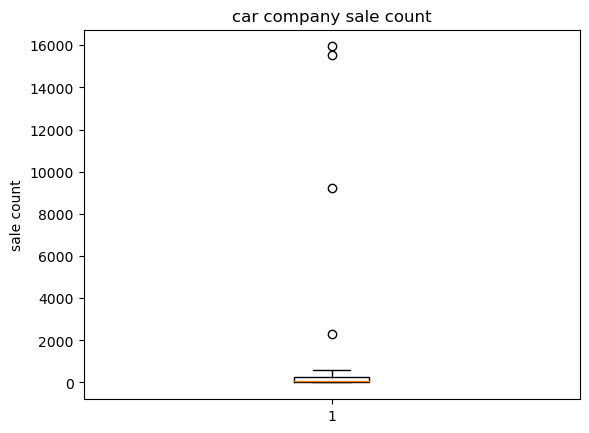

In [11]:
plt.boxplot(company_name)
plt.title('car company sale count')
plt.ylabel('sale count')

Most car companies made <2000 sales, those 4 companies made more sales look like outliners. However, all sales are valid. so I would like to separate the companies with most sales. (in this case, Toyota and Suzuki made 68.5% sales) from the rest and do analysis on them. 

Text(0, 0.5, 'sale count')

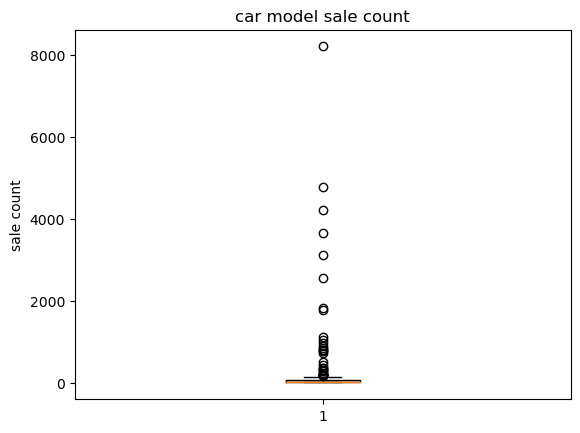

In [12]:
plt.boxplot(model_name)
plt.title('car model sale count')
plt.ylabel('sale count')

the mode of car model based on sale count is 1. from box plot it is also shown most models made <2000 sales, one model (Toyota corrola) made >8000 sales. It looks like an outliners. However, this is an indication of a popular car type. so I could focus on car models made more than 2000 sales only.

Text(0, 0.5, 'price in US$')

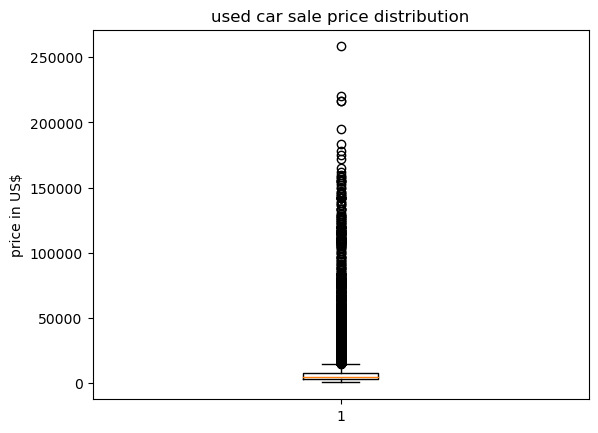

In [13]:
#convert price to US $ value
df['NewPrice'] = df['Price']/300
plt.boxplot(df['NewPrice'])
plt.title('used car sale price distribution')
plt.ylabel('price in US$')

There is a car sold for USD >250K, also a few sold for ~USD 200K, they looks like outliners. I plan to remove them before further analysis. 

Text(0, 0.5, 'mileage')

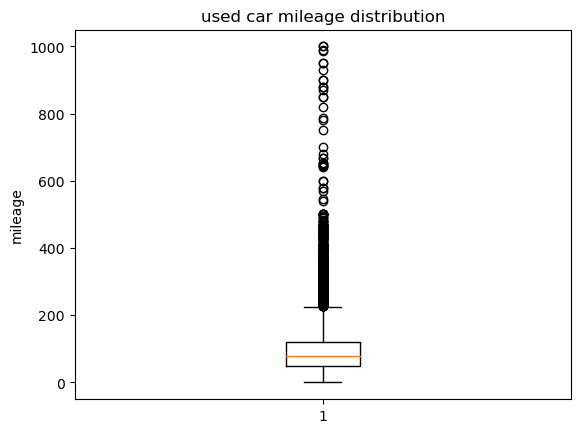

In [14]:
#convert mileage to make high mileage more readable
plt.boxplot( df['Mileage']/1000)
plt.title('used car mileage distribution')
plt.ylabel('mileage')

most cars have mileage less than 500K. Since it is in pakistan, so it maybe okay to buy cars with extreme mileage. so unless further investigation, I will not consider any as outliner.

Text(0, 0.5, 'year')

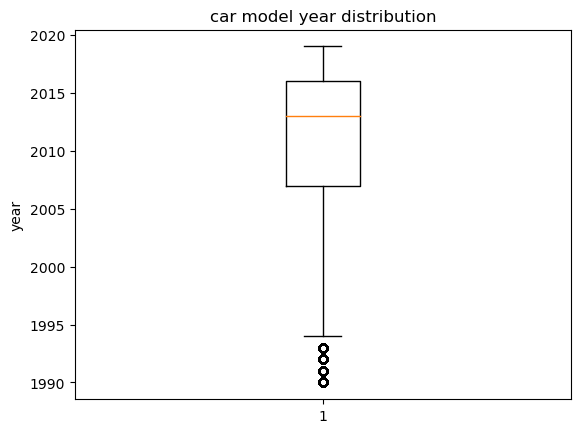

In [15]:
plt.boxplot( df['Model Year'])
plt.title('car model year distribution')
plt.ylabel('year')

though box plot shows car older than 1995 are outliner. Since it is in pakistan, so it maybe okay to buy very old cars. Unless further investigation, I will not consider any years as outliner.

### Task 4. Compare two scenarios in your data using a PMF
 Based on the analysis before, I would like pick corolla sales, For variable of engine capacity, compare difference on PMF based on the transmission types (auto vs manual)

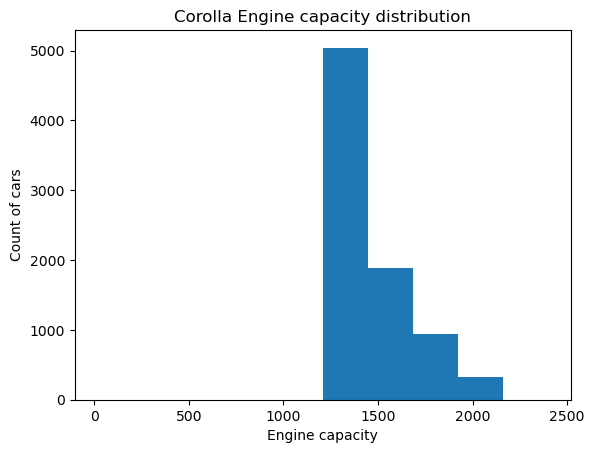

In [3]:
#create subdataset with converted price as USD
Corrola = df[df['Model Name'] == 'Corolla']
Cengine = Corrola[['Engine Capacity', 'Transmission Type']]
plt.hist(Cengine['Engine Capacity'])
plt.title('Corolla Engine capacity distribution')
plt.xlabel('Engine capacity')
plt.ylabel('Count of cars')
plt.show()

In [17]:
auto = Cengine[Cengine['Transmission Type'] == 'Automatic']
aengine = auto['Engine Capacity']
manual = Cengine[Cengine['Transmission Type'] == 'Manual']
mengine = manual['Engine Capacity']

In [18]:
# create pmf
auto_pmf = thinkstats2.Pmf(aengine, label='auto transmission')
manual_pmf = thinkstats2.Pmf(mengine, label='manual')
#plt.hist(manual_pmf, density = 'TRUE')
#thinkplot.Hist(auto_pmf)

In [4]:
#plot pmf
thinkplot.PrePlot(2)
thinkplot.Hist(auto_pmf, align='right')
thinkplot.Hist(manual_pmf, align='left')
thinkplot.Config(xlabel='engine Capacity', ylabel='PMF')

NameError: name 'auto_pmf' is not defined

<Figure size 640x480 with 0 Axes>

Since Engine type are discrete values and there are dominant capacities (like 84% of manual version has 1300 capacity), so there are not much overlap of engine capacity. it does show the auto and manual tranmission have quite different engine capacity distribution

### Task 5. Create 1 CDF with one of your variables. what does this tell you about your variable?

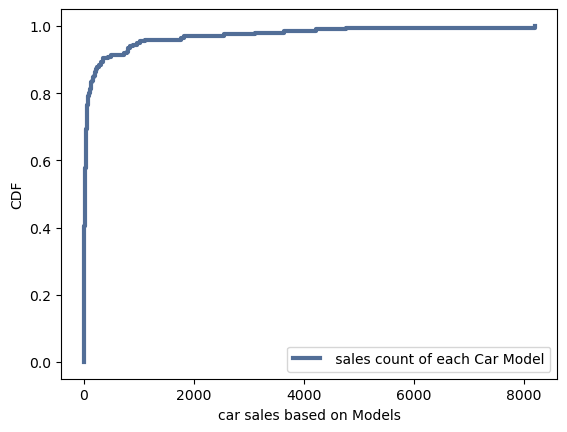

80.1 percent of models are with sales <100
models with sales >2000 are better than 96.94 % of models


<Figure size 800x600 with 0 Axes>

In [20]:
model = df['Model Name']
sales_count = model.value_counts()
cdf = thinkstats2.Cdf(sales_count, label=' sales count of each Car Model')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='car sales based on Models', ylabel='CDF')
print(round(cdf.PercentileRank(100),2),'percent of models are with sales <100')
print('models with sales >2000 are better than', round(cdf.PercentileRank(2000),2), '% of models' )

CDF chart shows the sales is not a normal distribution. below 100 is a almost stright vertical lines, indicate it is common that most car models do not make many sales. 
Further caluclation shows that 80% of the model are with sales below 100. On the other hand, if a car makes 2000 sales or more, it is ranked top 3%. In other words, people there only buy a few models.

### Task 6. Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen.

From above CDF chart, it looks like the car sales based on model is a pareto distribution. I would like to take some samples and plot the pareto distribution, validate if it fits. 

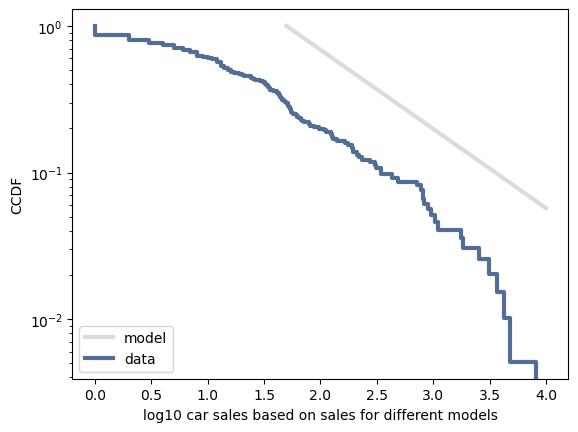

In [21]:
log_sales = np.log10(sales_count)
cdf = thinkstats2.Cdf(sales_count, label="data")
cdf_log = thinkstats2.Cdf(log_sales, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=50, alpha=0.54, low=0, high=1e4)
thinkplot.Plot(np.log10(xs), 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(
    xlabel="log10 car sales based on sales for different models", ylabel="CCDF", yscale="log", loc="lower left")

The pareto distribution has a slope very similar to the slope of CDF of log scale of car sales. the position is shifted but slope fit. so I believe the model based car sales is a pareto distribution.  

### Task 6 Create two scatter plots comparing two variables and provide your analysis on correlation and causation. check covariance, Pearson’s correlation, and Non-Linear Relationships 

In [22]:
# check corrlation of all variables. 
df.corr().style.background_gradient(cmap='cividis')

C:\Users\Daisy\AppData\Local\Temp\ipykernel_4704\4240556666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='cividis')


,ID,Price,Model Year,Mileage,Engine Capacity,NewPrice
ID,1.000000,-0.012383,-0.032425,-0.009007,-0.011992,-0.012383
Price,-0.012383,1.000000,0.217494,-0.188658,0.645924,1.000000
Model Year,-0.032425,0.217494,1.000000,-0.604310,-0.151290,0.217494
Mileage,-0.009007,-0.188658,-0.604310,1.000000,0.098138,-0.188658
Engine Capacity,-0.011992,0.645924,-0.151290,0.098138,1.000000,0.645924
NewPrice,-0.012383,1.000000,0.217494,-0.188658,0.645924,1.000000


In [23]:
df.cov().style.background_gradient(cmap='cividis')

C:\Users\Daisy\AppData\Local\Temp\ipykernel_4704\1682656864.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov().style.background_gradient(cmap='cividis')


,ID,Price,Model Year,Mileage,Engine Capacity,NewPrice
ID,176507049.947978,-483514746.307049,-2756.753649,-7617165.703824,-97934.496401,-1611715.821023
Price,-483514746.307049,8638139484440.028320,4090690.479125,-35296342903.465141,1166939464.765302,28793798281.466770
Model Year,-2756.753649,4090690.479125,40.952357,-246174.537446,-595.124142,13635.634930
Mileage,-7617165.703824,-35296342903.465141,-246174.537446,4052169857.437716,3840075.014100,-117654476.344884
Engine Capacity,-97934.496401,1166939464.765302,-595.124142,3840075.014100,377844.819458,3889798.215884
NewPrice,-1611715.821023,28793798281.466770,13635.634930,-117654476.344884,3889798.215884,95979327.604889


#### Causation wise, car price, model year, mileage and enginer capacity have relationship with each other.

#### Looks like Engine capacity vs Price, Model year vs Mileage, as well as Mileage vs Price has strong *correlation*. 

#### At the same Time, Based on covariance value, Pirce vs Mileage, Model year vs Mileage are both *inversely related*, which are expected. Price and Engin capacity are *positively related*, which is also expected. 

### Also from the scatter plot below, it showed that Price vs Mileage are not linear related. 

Create scatter plot for engine capacity vs price, however, the engine capacity is not a real continuous variable so there is no clear relationship. Then use mileage vs Price to ceate a continuous variable scatter plot. 

Text(0, 0.5, 'Price in US$')

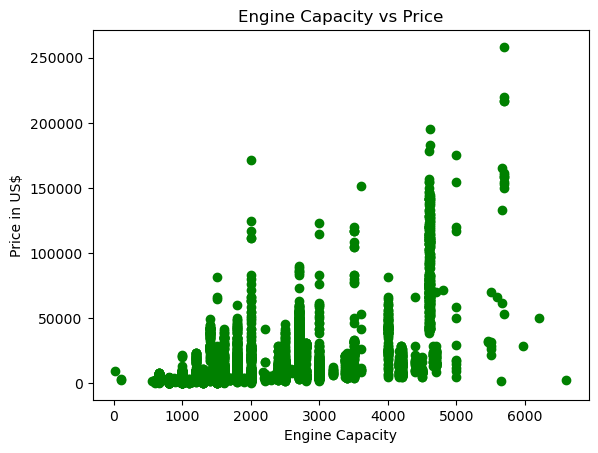

In [24]:
x1 = df['Engine Capacity']
y1 = df['Price']/300
plt.ticklabel_format(axis='both', style='sci', useLocale= True)
plt.scatter(x1, y1, color = 'green')
plt.title('Engine Capacity vs Price')
plt.xlabel('Engine Capacity')
plt.ylabel('Price in US$')

Text(0, 0.5, 'Price in US$')

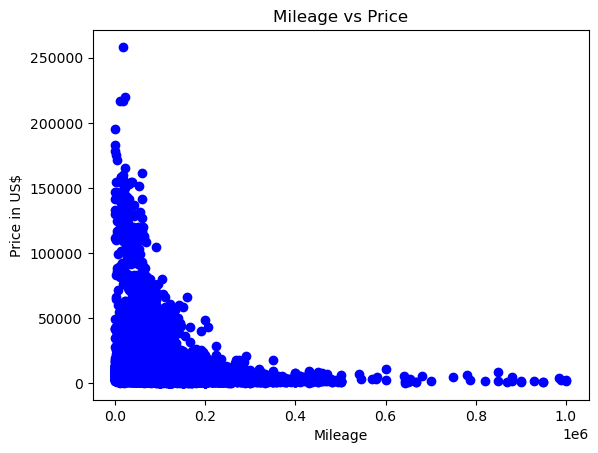

In [25]:
x2 = df['Mileage']
y2 = df['Price']/300
plt.ticklabel_format(axis='x', style='sci', useLocale= True)
plt.scatter(x2, y2, color = 'blue')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price in US$')

#### check correlation efficency between mileage and price, it showed that the Pearson correlation coefficient between mielage and price is about -0.19

In [31]:
ce = np.corrcoef(x2, y2)
ce

array([[ 1.        , -0.18865824],
       [-0.18865824,  1.        ]])

In [26]:
import scipy.stats
scipy.stats.pearsonr(x2, y2) 

PearsonRResult(statistic=-0.188658241852936, pvalue=0.0)

In [12]:
#now try to focus on most polular car: Corrola and remove outliners(mileage >200K and price outside 2000K and 3200K range)
toyota = df[df['Model Name'] == 'Corolla']
comm_use = toyota[toyota['Mileage']<200000]
Common = comm_use[comm_use['Price'] <3200000]
Common_Corolla = comm_use[comm_use['Price'] >2000000]

Text(0, 0.5, 'Common Price in US$')

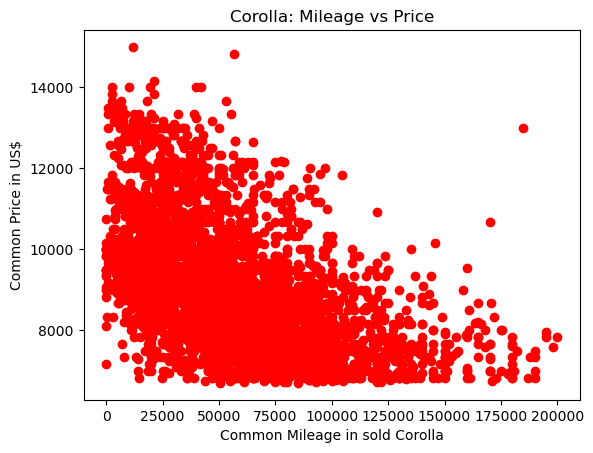

In [13]:
x3 = Common_Corolla['Mileage']
y3 = Common_Corolla['Price']/300
plt.ticklabel_format(axis='x', style='sci', useLocale= True)
plt.scatter(x3, y3, color = 'red')
plt.title('Corolla: Mileage vs Price')
plt.xlabel('Common Mileage in sold Corolla')
plt.ylabel('Common Price in US$')

In [28]:
Common_Corolla.corr().style.background_gradient(cmap='cividis')

C:\Users\Daisy\AppData\Local\Temp\ipykernel_4704\622503486.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Common_Corolla.corr().style.background_gradient(cmap='cividis')


,ID,Price,Model Year,Mileage,Engine Capacity,NewPrice
ID,1.000000,-0.028033,-0.004108,-0.029194,0.008779,-0.028033
Price,-0.028033,1.000000,0.518184,-0.528314,0.529473,1.000000
Model Year,-0.004108,0.518184,1.000000,-0.649104,-0.060330,0.518184
Mileage,-0.029194,-0.528314,-0.649104,1.000000,0.012842,-0.528314
Engine Capacity,0.008779,0.529473,-0.060330,0.012842,1.000000,0.529473
NewPrice,-0.028033,1.000000,0.518184,-0.528314,0.529473,1.000000


In [42]:
print('for common Corolla sold, the Pearson correlation coefficient between mileage and price')
ce2 = np.corrcoef(x3, y3)
print(ce2)

for common Corolla sold, the Pearson correlation coefficient between mileage and price
[[ 1.         -0.52831368]
 [-0.52831368  1.        ]]


### it showed that for common corolla sales, there is a much stronger ( but still moderate) relationship between price and mileage.  

### Task 7: hypothesis test: Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In the dataset, Toyota is the most popular used car brand: Toyota Corolla is the most popular model in this brand. I would like to test a difference in car Mileage means. If the difference of the mileage between corolla and rest Toyota models is satistically significant?
The null hypothesis: the mileage mean difference between them is not satistically significant. 

In [7]:
#get price data
Corolla = df[df['Model Name'] == 'Corolla']
C_mileage = Corolla.Mileage
Toyota = df[df['Company Name'] == 'Toyota']
Rest = Toyota[Toyota['Model Name'] != 'Corolla']
R_mileage = Rest.Mileage
data = C_mileage, R_mileage

In [8]:
#borrow the diffmeanspermute class 
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [9]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print('Average mileage of used corolla is', round(C_mileage.mean(),0))
print('Average mileage of used other Toyota car is', round(R_mileage.mean(),0))
print('P-test pvalue is', pvalue)

Average mileage of used corolla is 102440.0
Average mileage of used other Toyota car is 90655.0
P-test pvalue is 0.0


#### Conclusion: P-value is 0.0, the mileage mean difference is statistical significant, which mean we will expect the average mileage from corolla and rest of the Toyota car models are statistically different.

I also want to check the mean price of Corolla vs rest of Toyota model. if the If the difference of the mean price between corolla and rest Toyota models is satistically significant? The null hypothesis: the mean price difference between them is not satistically significant.

In [10]:
Corolla = df[df['Model Name'] == 'Corolla']
P_corolla = Corolla.Price

Toyota = df[df['Company Name'] == 'Toyota']
Rest_toyota = Toyota[Toyota['Model Name'] != 'Corolla']
PT_nocorolla =Rest_toyota.Price

data2 = P_corolla, PT_nocorolla

ht2 = DiffMeansPermute(data2)
pvalue2 = ht2.PValue()
print('Average price of used corolla is', round(P_corolla.mean(),0))
print('Average price of used other Toyota car is', round(PT_nocorolla.mean(),0))
print('P-test pvalue is', pvalue2)

Average price of used corolla is 2013974.0
Average price of used other Toyota car is 4088326.0
P-test pvalue is 0.0


##### Conclusion: P-value is 0.0, the price mean difference is statistical significant, which means that we will expect the average price of corolla and rest of the Toyota car models are statistically different.

### Task 8: regression analysis: on either one dependent and one explanatory variable, or multiple explanatory variables 

Based on correlation analysis above, For toyota corolla, I would like to do an multiple variable regression, use price as dependent variable, model year, mileage and enginer capacity as explanatory variables.  from the scatter plot, it seems may not be a linear regression. so I will start with linear regression and then try to use quadratic model of mileage

Also to make the model accurate, I will use common_corolla sub dataset 


In [14]:
import statsmodels.formula.api as smf 
Common_Corolla2 = Common_Corolla.rename(columns={'Model Year': 'M_year', 'Engine Capacity': 'Ecapacity'})
y= round(Common_Corolla2['Price']/300)
Common_Corolla2['USprice'] = y
x = Common_Corolla2['Mileage']/1000
Common_Corolla2['Kmileage'] = x 
formula = ('USprice ~ M_year + Kmileage + C(Ecapacity)')
linear_results = smf.ols(formula, data=Common_Corolla2).fit()
linear_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                USprice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     2152.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:55:56   Log-Likelihood:                -30741.
No. Observations:                3877   AIC:                         6.150e+04
Df Residuals:                    3868   BIC:                         6.156e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -7.747e+05   1.31e+04    -59.241      0.000      -8e+05   -7.49e+05
C(Ecapacity)[T.1300] -1441.0930    673.198     -2.141      0.032   -2760.951    -121.235
C(Ecapacity)[T.1400]  -571.7706    951.593     -0.601      0.548   -2437.442    1293.901
C(Ecapacity)[T.1500]  2183.5448    674.272      3.238      0.001     861.581    3505.508
C(Ecapacity)[T.1600]  -268.8956    673.387     -0.399      0.690   -1589.124    1051.333
C(Ecapacity)[T.1798]   879.4125    681.801      1.290      0.197    -457.310    2216.135
C(Ecapacity)[T.1800]   815.0296    673.498      1.210      0.226    -505.415    2135.474
M_year                 389.2476      6.476     60.104      0.000     376.550     401.945
Kmileage               -10.8785      0.401    -27.102      0.000     -11.665     -10.092
==============================================================================
Omnibus:                      227.999   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.020
Skew:                           0.243   Prob(JB):                    5.51e-161
Kurtosis:                       5.082   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#now use quadratic model of mileage
Common_Corolla2['Kmileage2'] = Common_Corolla2.Kmileage**2

In [16]:
formula = ('USprice ~ M_year + Kmileage2 + C(Ecapacity)')
linear_results = smf.ols(formula, data=Common_Corolla2).fit()
linear_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                USprice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1893.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:56:35   Log-Likelihood:                -30943.
No. Observations:                3877   AIC:                         6.190e+04
Df Residuals:                    3868   BIC:                         6.196e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.764e+05   1.29e+04    -67.766      0.000   -9.02e+05   -8.51e+05
C(Ecapacity)[T.1300] -1731.4567    708.889     -2.442      0.015   -3121.288    -341.625
C(Ecapacity)[T.1400]  -644.1241   1002.271     -0.643      0.520   -2609.154    1320.906
C(Ecapacity)[T.1500]  2000.8191    710.116      2.818      0.005     608.581    3393.057
C(Ecapacity)[T.1600]  -532.3869    709.115     -0.751      0.453   -1922.663     857.889
C(Ecapacity)[T.1798]   606.1297    717.969      0.844      0.399    -801.503    2013.763
C(Ecapacity)[T.1800]   527.1571    709.207      0.743      0.457    -863.297    1917.612
M_year                 439.5764      6.405     68.631      0.000     427.019     452.134
Kmileage2               -0.0437      0.003    -16.760      0.000      -0.049      -0.039
==============================================================================
Omnibus:                      272.631   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              890.620
Skew:                           0.322   Prob(JB):                    4.02e-194
Kurtosis:                       5.258   Cond. No.                     8.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since engine capacity is a catagoric variable and most likely correlated to the car models. I would like to try again without engine capacity.

In [18]:
formula2 = ('USprice ~ M_year + Kmileage2')
linear_results2 = smf.ols(formula2, data=Common_Corolla2).fit()
linear_results2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                USprice   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     805.5
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.99e-293
Time:                        21:57:33   Log-Likelihood:                -33355.
No. Observations:                3877   AIC:                         6.672e+04
Df Residuals:                    3874   BIC:                         6.673e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.103e+05   2.19e+04    -23.313      0.000   -5.53e+05   -4.67e+05
M_year       257.6879     10.850     23.750      0.000     236.416     278.960
Kmileage2     -0.0570      0.005    -11.756      0.000      -0.066      -0.047
==============================================================================
Omnibus:                      404.332   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.364
Skew:                           0.898   Prob(JB):                    1.25e-117
Kurtosis:                       3.326   Cond. No.                     7.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion
After apply quadratic model of mileage, the mileage impact reduced greatly. The Model year impact remains strong and almost the same. I would say that model year is a more important factor to predict price of a used corolla. Also the most common engine capacity (like 1300 and 1500) have much stronger influence.

### 
### 

### Summary:
#### This is an interesting dataset. I know some people from Pakistan and I am interested to know their life back in home country. I would like to use this used car sale dataset to find out some facts of used car sale there. 
1. what factors people is looking for when buying a used car?
2. What's the most popular car there?
3. what's the price and mileage range people most likely looking for
4. what's the model year appeared on the market
5. which factor influence the car price most.

##### Outcome:
I used histogram and box plot to study the distribution of the vairables, I also performed CDF, PMF analysis. Last, I used scatter plot, correlation analysis and regression to check the relationship between the variables. Finally I tried to build a model to predict the car price. After the EDA, I concluded that model year is the most important factor, it is a pareto distribution, so a few car models (like Toyota and suzuki) dominated the market. Furthermore, people there like Corolla much more than any other car models. For car model year, car made between 2005 to wo16 are most popular. car with mileage less than 200K is popular but a lot of people also buy cars with higher mileages, especially when it is a popular brand. People there use model type, model year and mileage to decide the car price, which is similar to situation in US.

for Corolla, if I need to predict the price of a used car, the car model year is the most important factor, the mileage play some roles but not as strong as model year. 

##### what missed:
for a used car analysis, I would think this dataset have all the important factors/vaiables listed. However, it did not list the year when sales happens, or the dataset list the time frame when data was collected, so I think it is hard to apply the conclusion to any particular time like now. 

##### any variables could have helped in the analysis:
I believe the location of the sales, the color of the car may also impact the car sales price, which I did not included in the analysis. 

##### any assumption made were incorrect?
I am surprise to see that engine capacity has much stronger influence power than model year. After this variable removed, the regression result becomes more reasonable.

##### challanges and anything not fully understand:
First, I tried to pick numeric variable instead of text variables. But there are still many catagory variables even they showed as numbers, like engine capacity,  model year. I am not very confident on handle these type of variables.

Second, the distributions of interested variables are not normal. also the correlation maynot be linear. it may need further advanced skill to analysis them better. 


